In [2]:
# Manage imports
import re
import pandas as pd
import xlsxwriter
import matplotlib.pyplot as plt

In [3]:
# Read corpus from file
inputFileName = './corpus.txt'
outputFileName = './corpus_word_count.xlsx'
corpusFile = open(inputFileName, 'r', encoding='utf8')
corpus = corpusFile.read()
corpusFile.close()

In [4]:
# Clean the corpus by removing separators and useless symbols
separators = ['\r\n', '\n', '\t', ',', '|', '?', '!', '।', ';', '.']
useless_symbols = ['', '\r', '\'', '\"', '-', '—', '(', ')', '[', ']',
                   '.', '*', '~', '‘', '’', '`', '%', '\/', '•',
                   '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']
useless_symbols_regex = '[A-Za-z0-9]'
corpus = corpus.replace(' :', ':')
for i in useless_symbols:
    corpus = corpus.replace(i, '')
for i in separators:
    corpus = corpus.replace(i, ' ')
corpus = re.sub(useless_symbols_regex, '', corpus)
for i in range(5):
    corpus = corpus.replace('  ', ' ')
for i in useless_symbols:
    corpus = corpus.replace(i, '')
corpus = corpus.strip()

In [5]:
# Extract words from the corpus
wordList = re.split(' ', str(corpus))
print('Corpus Length: ', len(corpus))
print('Word List: ', len(wordList))

Corpus Length:  3750365
Word List:  716604


In [6]:
# Initialize the worksheet
workbook = xlsxwriter.Workbook(outputFileName)
worksheet1 = workbook.add_worksheet()
row1 = col1 = 0
worksheet1.write(row1, 0, 'Word')
worksheet1.write(row1, 1, 'Occurrences')
worksheet1.write(row1, 2, 'Rank')
worksheet1.write(row1, 3, 'f.r^alpha')
worksheet1.write(row1, 4, 'f.(r+beta)^alpha')

0

In [7]:
worksheet2 = workbook.add_worksheet()
row2 = col2 = 0
worksheet2.write(row2, 0, 'Types')
worksheet2.write(row2, 1, 'Corpus Length')

0

In [8]:
# Extraction of unique words
types = tokens = 0
duplicates = []
for word in wordList:
    if word != ' ' or word != '':
        tokens += 1
        if word not in duplicates:
            count = 0
            types += 1
            duplicates.append(word)
            for i in wordList:
                if i == word:
                    count += 1
            row1 += 1
            worksheet1.write(row1, 0, word)
            worksheet1.write(row1, 1, count)
        if tokens % 200 == 0:
            row2 += 1
            worksheet2.write(row2, 0, types)
            worksheet2.write(row2, 1, tokens)
workbook.close()
print('Unique Words =', types)
print('Tokens       =', tokens)
print('TTR          =', types / tokens)

Unique Words = 39110
Tokens       = 716604
TTR          = 0.05457686532589826


In [9]:
xl = pd.ExcelFile(outputFileName)
df1 = xl.parse('Sheet1')
length1 = len(df1.index) or 0
df2 = xl.parse('Sheet2')
length2 = len(df2.index) or 0

In [10]:
df1 = df1.sort_values('Occurrences', ascending=False) #Sorting out output in decending order
for i in range(0, length1):
    df1.iloc[i,2] = int(i + 1)             # Giving rank to sorted output

In [11]:
alpha = 0.85
beta = 2.7
for i in range(0, length1):
    df1.iloc[i,3] = int(df1.iloc[i,2] * (df1.iloc[i,1] ** alpha))           # finding f.r^alpha
    df1.iloc[i,4] = int(df1.iloc[i,2] * ((df1.iloc[i,1] + beta) ** alpha))  # finding f.(r+beta)^alpha


In [12]:
writer = pd.ExcelWriter(outputFileName) 
df1.to_excel(writer,'Sheet1',index=False) # Entering this output into the file 
writer.save()

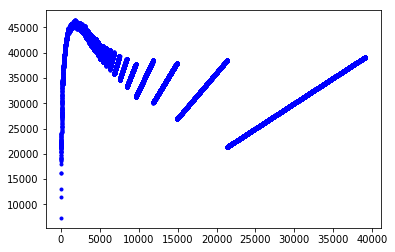

In [13]:
# Zipf's Law
plt.plot(df1.iloc[:, 2], df1.iloc[:, 3], 'b.')
plt.show()

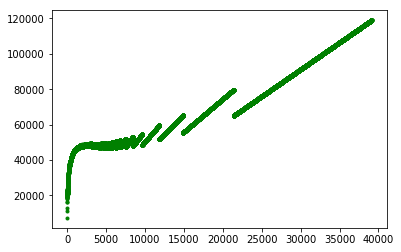

In [14]:
# Mandelbrot's Approximation
plt.plot(df1.iloc[:, 2], df1.iloc[:, 4], 'g.')
plt.show()

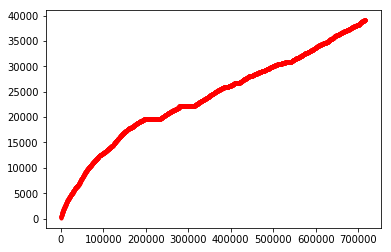

In [15]:
# Heap's Law
plt.plot(df2.iloc[:, 1], df2.iloc[:, 0], 'r.')
plt.show()